# Age and gender recognition using Neural networks


## Import packages for data handling and visualisation


Please use python 3.8-3.11 as tensorflow-cpu only supperted through those versions

In [ ]:
#only needed if ran locally
#!pip uninstall tensorflow -y
#!pip install tensorflow==2.13
#!pip install kaggle
#!pip install numpy
#!pip install pandas
#!pip install os
#!pip install matplotlib
#!pip install warnings
#!pip install seaborn
#!pip install tqdm
#!pip install PIL
#!pip install kagglehub #import data thourgh Kaggle api
#!pip install pydot

  Using cached kaggle-1.7.4.5-py3-none-any.whl.metadata (16 kB)
  Using cached protobuf-6.31.1-cp310-abi3-win_amd64.whl.metadata (593 bytes)
  Using cached python_slugify-8.0.4-py2.py3-none-any.whl.metadata (8.5 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl.metadata (2.4 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached kaggle-1.7.4.5-py3-none-any.whl (181 kB)
Using cached protobuf-6.31.1-cp310-abi3-win_amd64.whl (435 kB)
Using cached python_slugify-8.0.4-py2.py3-none-any.whl (10 kB)
Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)

   ---------------- ----------------------- 2/5 [python-slugify]
   ------------------------ --------------- 3/5 [protobuf]
   -------------------------------- ------- 4/5 [kaggle]
   -------------------------------- ------- 4/5 [kaggle]
   ---------------------------------------- 5/5 [kaggle]

   ---------------------------------------- 0.0/13.0 MB ? eta 

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------  7.9/8.1 MB 60.8 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 29.3 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 32.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 51.4 MB/s eta 0:00:00
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----------------- ---------------------- 3/7 [fonttools]
   ------------

ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


Enter to cmd window and type: pip install tensorflow-cpu do this from cmd window with jupyter notebook closed otherwise it wont work

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from tqdm.notebook import tqdm #I got this trick from another project, it is for getting the loading bars in the notebook
from PIL import Image #Python Imaging Library (expansion of PIL) is the image processing package for Python language.

warnings.filterwarnings('ignore')

%matplotlib inline

## Import packages for neural networks

In [2]:
import tensorflow as tf
from keras.preprocessing import image
from keras.models import Sequential, Model
import keras.layers
from keras.utils import plot_model
#if doesn't work try tensorflow.keras........ I had problems with it too
# pip install tensorflow 2.12.0 as version 2.18.0 was too unstable with my multi output model

In [6]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
jangedoo_utkface_new_path = kagglehub.dataset_download('jangedoo/utkface-new')

print('Data source import complete.')

100%|███████████████████████████████████████████████████████████████████████████████| 331M/331M [00:11<00:00, 29.6MB/s]

Extracting files...


Data source import complete.


This part would print all the filepaths but to save resources it will be hidden for now.

In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
    # for filename in filenames:
        # print(os.path.join(dirname, filename))
#in order to save runtime this will be hidden

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [8]:
IMG_DIR='/kaggle/input/utkface-new/UTKFace'

In [11]:
image_path=[]
gender_label=[]
age_label=[]
reduced_data_len=np.linspace(0,100,1)

# Use the path from kagglehub.dataset_download
# The UTKFace directory is inside the downloaded path
IMG_DIR = os.path.join(jangedoo_utkface_new_path, 'UTKFace')

for filename in tqdm(os.listdir(IMG_DIR)):
    #we store the image path
    image_path.append(os.path.join(IMG_DIR, filename))

    #The name of the image contains age gender and ethincity, in this order.
    #We use the underscore to separate than store these values
    temp=filename.split('_')
    age_label.append(int(temp[0]))
    gender_label.append(int(temp[1]))

  0%|          | 0/23708 [00:00<?, ?it/s]

In [12]:
#Converting to pandas dataframe so the data is easily accesable
df=pd.DataFrame()
df['image']=image_path
df['age']=age_label
df['gender']=gender_label
df.head()

,image,age,gender
0,C:\Users\Daniel\.cache\kagglehub\datasets\jang...,100,0
1,C:\Users\Daniel\.cache\kagglehub\datasets\jang...,100,0
2,C:\Users\Daniel\.cache\kagglehub\datasets\jang...,100,1
3,C:\Users\Daniel\.cache\kagglehub\datasets\jang...,100,1
4,C:\Users\Daniel\.cache\kagglehub\datasets\jang...,100,1


Please note that as the genders are represendted by numbers they already encoded our data for us, making it easier to handle but harder to read. Here we create a dictionary we can call when we want to actually see the results

In [13]:
gender_dict={0:'Male', 1:'Female'}

##Analysing data


Age: 55 Gender: Male


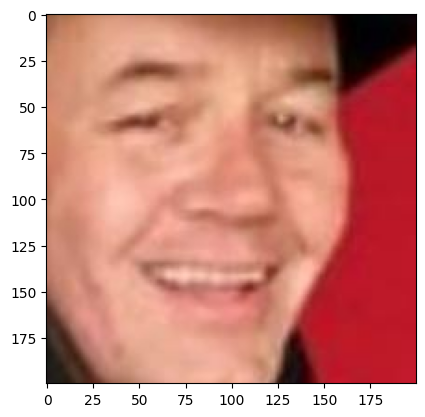

In [198]:
import random as rnd
#we select a random image
rand_ind=rnd.randint(0,len(df))
img=Image.open(df['image'][rand_ind])
plt.imshow(img)

age=df['age'][rand_ind]
gender=df['gender'][rand_ind]
print(f"Age: {age} Gender: {gender_dict[gender]}")

Let's take a look at the age distributrition of our dataset.

###Age distribution

<Figure size 600x400 with 0 Axes>

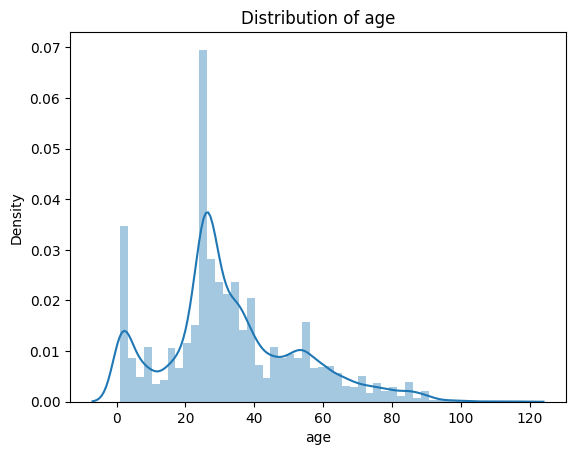

<Figure size 600x400 with 0 Axes>

In [15]:
sns.distplot(df['age'])
plt.title('Distribution of age')
plt.figure(figsize=(6, 4))

As we can see people betwee 0-2 and 22-24-26 years. In order for our model to yield the best results it should be a normal distribution. It is a bit skewed towards younger ages so if our model is inaccurate we can come back and modify the training data.

In order to make the model more efficient we can also encode/normalise the age range so it it falls between 0-1. For the ease of understanding we will leave it like like here for now.

### Gender distribution

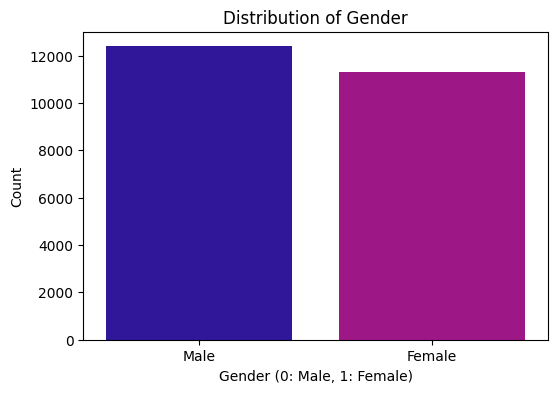

In [16]:

plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df, palette=['#2300af','#b40095'])
plt.title('Distribution of Gender')
plt.xlabel('Gender (0: Male, 1: Female)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Male', 'Female']) # Label x-axis ticks
plt.show()

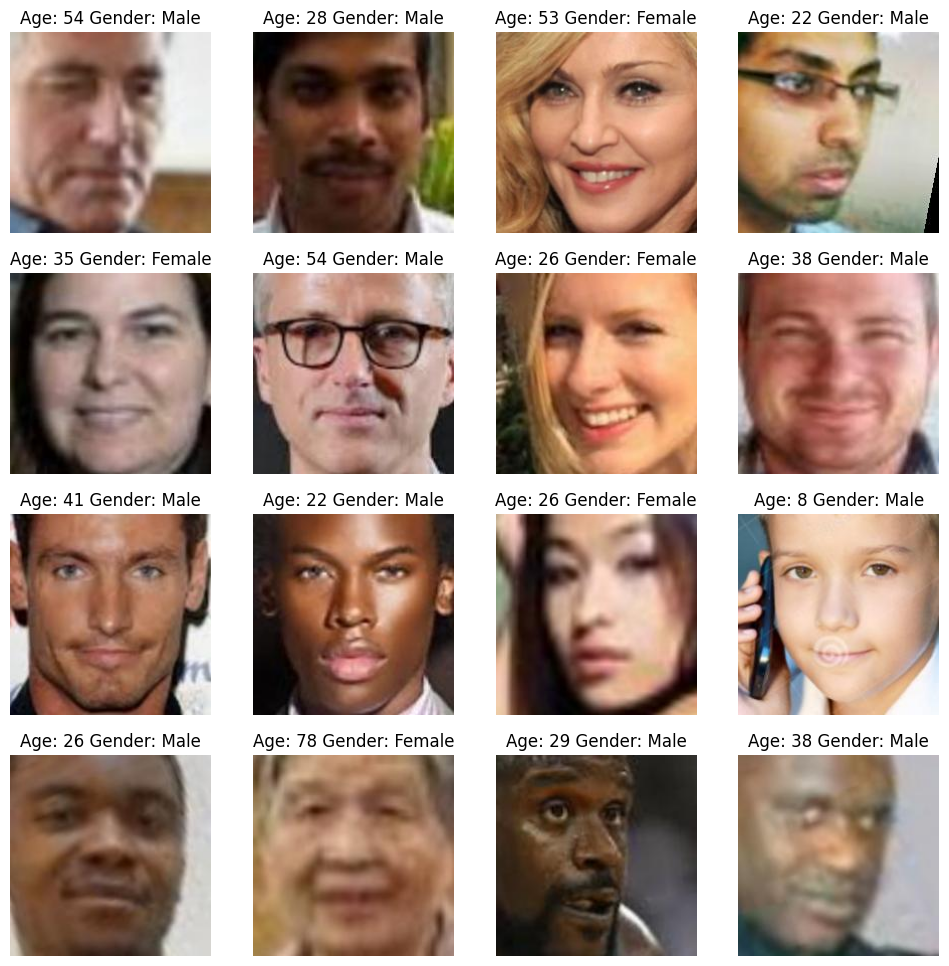

In [330]:
#we sample 16 randomly selected iamges from the dataset with their respective age and gender
plt.figure(figsize=(12,12))
for index in range(16):
  plt.subplot(4,4,index+1)
  rand_ind=rnd.randint(0,len(df)) #rand
  img=Image.open(df['image'][rand_ind])
  plt.axis('off')
  plt.imshow(img)
  age=df['age'][rand_ind] #we extract the age, related to the picture
  gender=df['gender'][rand_ind] #we extract the gender, related to the picture
  plt.title(f"Age: {age} Gender: {gender_dict[gender]}")

plt.show()

## Data processing

We are going to downsize the images and convert them to greyscale to save memory. In order to minimize the loss of information during downsizeing, we are going to use [Lanczos_resampling](https://en.wikipedia.org/wiki/Lanczos_resampling#:~:text=Lanczos%20resampling%20is%20typically%20used,a%20technique%20created%20by%20Lanczos.)

In [18]:
def extract_features(images):
  features = []
  for image_path in tqdm(images):
    img = Image.open(image_path).convert('L') # Convert to grayscale
    img = img.resize((128, 128), Image.Resampling.LANCZOS) # Use a better resampling filter than just antialiasing
    img = np.array(img)
    features.append(img)
  features = np.array(features)
  #making sure the dimensions are the same as our neural network takes
  features = features.reshape(len(features), 128, 128, 1)
  features = features.astype('float32') / 255.0 #converting to float and normalisation
  return features



Since in a greyscale image the pixel data is stored in integers, it is often necessary to convert it to float 32 for mathematical operations performed by neural networks.

**Normalisation**:
 Furthermore in a typical greyscale image the pixel values are usually between 0-255, by dividing with 255 we ensure that the pixel values will be between 0-1. Normalisation ensures that our model will converge faster and improve its performance

In [19]:
extracted_features=extract_features(df['image'])

  0%|          | 0/23708 [00:00<?, ?it/s]

In [232]:
#we store this in an np array, we will need it later for the prediction model
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [21]:
#We check the shape and set the input shape
print(extracted_features.shape) #double check if we got the correct dimensions
input_shape=(128, 128,1) #this is the input shape we are giving to our model

(23708, 128, 128, 1)


# Neural network Model

In [42]:
inputs=keras.layers.Input(input_shape)
conv1=keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu')(inputs) #we used relu activation during the classes as well
pool1=keras.layers.MaxPooling2D(pool_size=(2,2))(conv1)
conv2=keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu')(pool1)
pool2=keras.layers.MaxPooling2D(pool_size=(2,2))(conv2)
conv3=keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu')(pool2)
pool3=keras.layers.MaxPooling2D(pool_size=(2,2))(conv3)
conv4=keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu')(pool3)
pool4=keras.layers.MaxPooling2D(pool_size=(2,2))(conv4)

#we convert the result into a single dim vector
flat=keras.layers.Flatten()(pool3)

dense1=keras.layers.Dense(256, activation='relu')(flat)
dense2=keras.layers.Dense(256, activation='relu')(flat) #try it with (dense1)

dropout1=keras.layers.Dropout(0.5)(dense1)
dropout2=keras.layers.Dropout(0.5)(dense2)

output_gender=keras.layers.Dense(1, activation='sigmoid', name='gender_output')(dropout1) #sigmoid as the result is binary
output_age=keras.layers.Dense(1, activation='relu', name='age_output')(dropout2) #relu as we used that one but #try linear as age is a spectrum

model=Model(inputs=inputs, outputs=[output_gender, output_age])

model.compile(optimizer='adam', loss=['binary_crossentropy', 'mae'], metrics={'gender_output': 'accuracy', 'age_output': 'mae'}) #we used adam optimizer during classes but sgd has momentum if we want to try
#mae(mean absolut error) for the gender
#binary cross entropy for the age

In [30]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 128, 128, 1)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 126, 126, 32)      │             320 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 63, 63, 32)        │               0 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 61, 61, 64)        │          18,496 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 30, 30, 64)        │               0 │ conv2d_1[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 28, 28, 128)       │          73,856 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, 14, 14, 128)       │               0 │ conv2d_2[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten (Flatten)             │ (None, 25088)             │               0 │ max_pooling2d_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 256)               │       6,422,784 │ flatten[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 256)               │       6,422,784 │ flatten[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 256)               │               0 │ dense[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 256)               │               0 │ dense_1[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gender_output (Dense)         │ (None, 1)                 │             257 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ age_output (Dense)            │ (None, 1)                 │             257 │ dropout_1[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 12,938,754 (49.36 MB)

 Trainable params: 12,938,754 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
import pydot
keras.utils.plot_model(model,show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [35]:
history=model.fit(x=extracted_features,y=[y_gender, y_age], epochs=20, batch_size=32, validation_split=0.2)
##history=model.fit(x=extracted_features,y=[y_gender, y_age], epochs=10, batch_size=32, validation_split=0.2) for better accuracy

Epoch 1/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 94s 159ms/step - age_output_loss: 9.0076 - age_output_mae: 9.0076 - gender_output_accuracy: 0.7242 - gender_output_loss: 0.5446 - loss: 9.5521 - val_age_output_loss: 28.8649 - val_age_output_mae: 28.9744 - val_gender_output_accuracy: 0.7756 - val_gender_output_loss: 0.4658 - val_loss: 29.4413
Epoch 2/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 95s 160ms/step - age_output_loss: 7.3803 - age_output_mae: 7.3803 - gender_output_accuracy: 0.8421 - gender_output_loss: 0.3458 - loss: 7.7261 - val_age_output_loss: 25.2756 - val_age_output_mae: 25.3597 - val_gender_output_accuracy: 0.7940 - val_gender_output_loss: 0.4333 - val_loss: 25.7926
Epoch 3/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 95s 160ms/step - age_output_loss: 6.8940 - age_output_mae: 6.8940 - gender_output_accuracy: 0.8691 - gender_output_loss: 0.2989 - loss: 7.1929 - val_age_output_loss: 24.4732 - val_age_output_mae: 24.5650 - val_gender_output_accuracy: 0.8191 - val_gender_output_loss: 0.4234 - val_loss: 24.987

## Function to save model and training history

In [287]:
def save_model_and_history_to_csv(model, history, output_dir, filename_model, filename_history):

  history_df = pd.DataFrame(history.history)

  #Create a directory to save the history if it doesn't exist
  output_dir = 'G:\BME\machine-learning\IML project\saved_models'
  os.makedirs(output_dir, exist_ok=True)

  # pecify the path to save the CSV file
  history_path = os.path.join(output_dir, filename_history)

  #Save the history to the specified path
  history_df.to_csv(history_path, index=False) #index false so we don't write row names

  #Specify the full path to save the model (including filename and extension)
  model_path = os.path.join(output_dir, filename_model) #keras is the current version h5 is legacy

  #Save the model
  model.save(model_path)

  print(f"Model and Training history saved to {output_path}")
  return True

## Evaluating the results - Loss and accuracy

### Gender prediction model

Text(0.5, 0, 'Epochs')

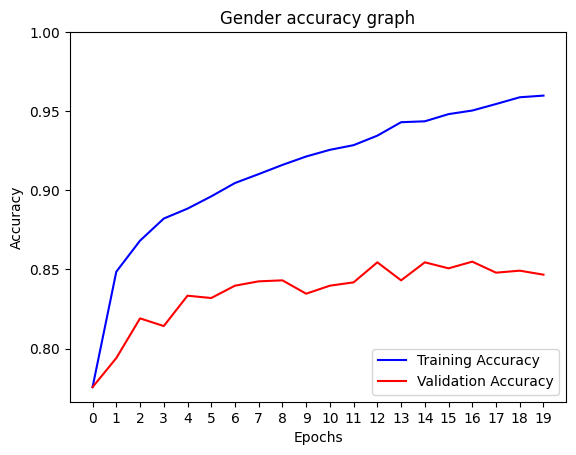

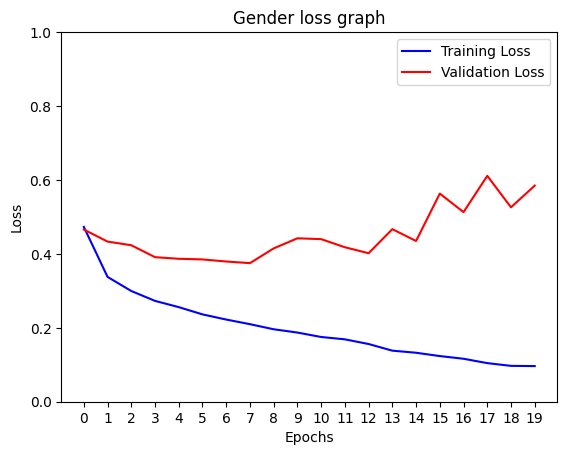

In [110]:
acc=history.history['gender_output_accuracy']
val_acc=history.history['val_gender_output_accuracy']

loss=history.history['gender_output_loss']
val_loss=history.history['val_gender_output_loss']
epochs=range(len(acc)) # we can tell how many epcochs we had from the number of

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title("Gender accuracy graph")
plt.xticks(range(len(epochs))) # Set x-axis ticks to integers
plt.xlabel('Epochs')
plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.ylim([0,1.0])
plt.title("Gender loss graph")
plt.Figure()
plt.xticks(range(len(epochs)))# Set x-axis ticks to integers
plt.xlabel('Epochs')

Around 12 epochs we get minimal validation loss, and maximal validation accuracy. Above that it seems we are overfitting the data

### Age prediction model

Text(0, 0.5, 'Loss')

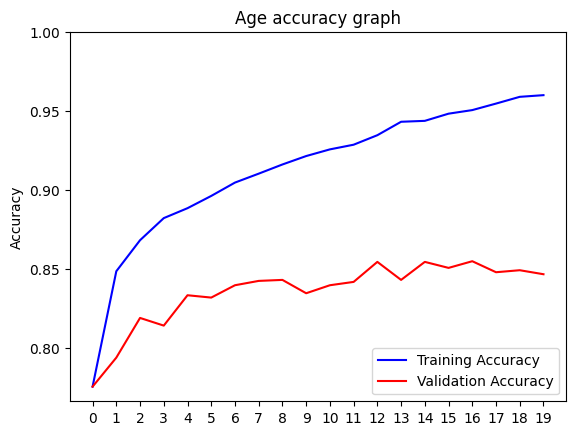

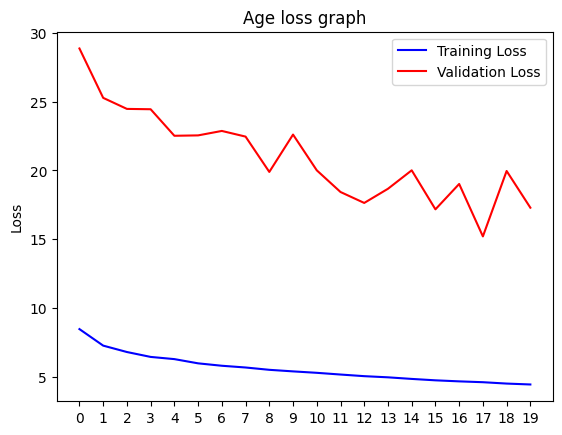

In [109]:
loss=history.history['age_output_loss']
val_loss=history.history['val_age_output_loss']
epochs=range(len(loss))



plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title("Age accuracy graph")
plt.xticks(range(len(epochs)))
plt.xlabel('Epochs')
plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.legend(loc='upper right')
plt.title("Age loss graph")
plt.xticks(range(len(epochs)))
plt.xlabel('Epochs')
plt.ylabel('Loss')


**Save everything**

In [291]:
save_model_and_history_to_csv(model,history,'G:\BME\machine-learning\IML project\saved_models', 'age_gender_model_20epochs_adam.keras','training_history_epoch20_reluactivation.csv')

Model and Training history saved to G:\BME\machine-learning\IML project\saved_models\training_history_epoch20_reluactivation.csv


True

##Neural network model with 30 epochs

In [77]:
history1=model1.fit(x=extracted_features,y=[y_gender, y_age], epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 98s 163ms/step - age_output_loss: 11.1317 - age_output_mae: 11.1317 - gender_output_accuracy: 0.6232 - gender_output_loss: 0.6710 - loss: 11.8027 - val_age_output_loss: 31.3440 - val_age_output_mae: 31.4707 - val_gender_output_accuracy: 0.7406 - val_gender_output_loss: 0.5188 - val_loss: 31.9907
Epoch 2/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 98s 165ms/step - age_output_loss: 7.7008 - age_output_mae: 7.7008 - gender_output_accuracy: 0.8140 - gender_output_loss: 0.3996 - loss: 8.1004 - val_age_output_loss: 28.6755 - val_age_output_mae: 28.7882 - val_gender_output_accuracy: 0.7843 - val_gender_output_loss: 0.4599 - val_loss: 29.2482
Epoch 3/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 98s 166ms/step - age_output_loss: 7.0738 - age_output_mae: 7.0738 - gender_output_accuracy: 0.8562 - gender_output_loss: 0.3231 - loss: 7.3969 - val_age_output_loss: 24.2644 - val_age_output_mae: 24.3400 - val_gender_output_accuracy: 0.8013 - val_gender_output_loss: 0.4313 - val_loss: 24.

## Evaluating the results - Loss and accuracy- 30 epochs

### Gender prediciton model

<Figure size 640x480 with 0 Axes>

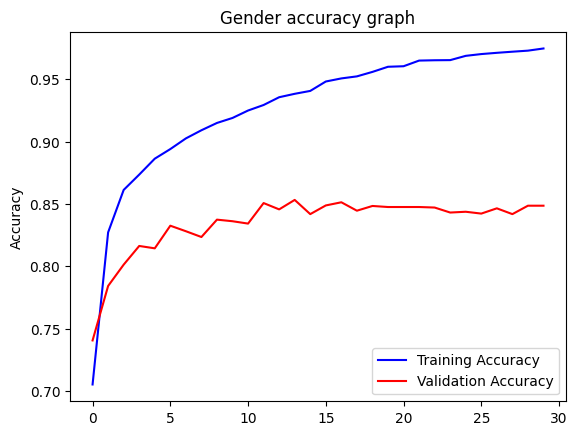

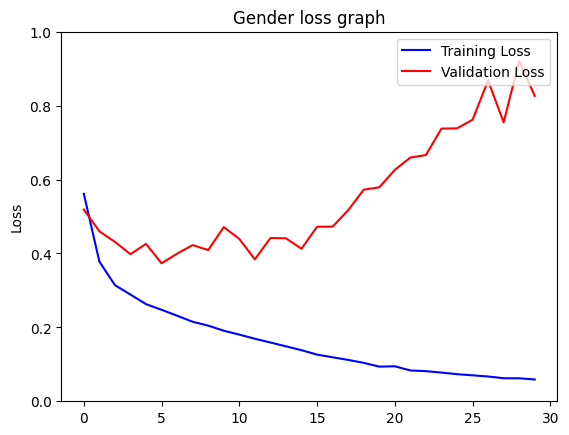

In [111]:
acc=history1.history['gender_output_accuracy']
val_acc=history1.history['val_gender_output_accuracy']

loss=history1.history['gender_output_loss']
val_loss=history1.history['val_gender_output_loss']
epochs=range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')

plt.title("Gender accuracy graph")
plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.ylim([0,1.0])
plt.title("Gender loss graph")
plt.Figure()




We can see that with the increase in the number of epochs we overfit the data for gender prediction. We can conclude this from the fact that even though the training loss keeps converging the validation loss shoots back up. In case we want to maximize both validation accuracy and minimize the validation loss, we should stick to the previously found 12 epochs as it seems optimal

### Age prediciton model

Text(0, 0.5, 'Loss')

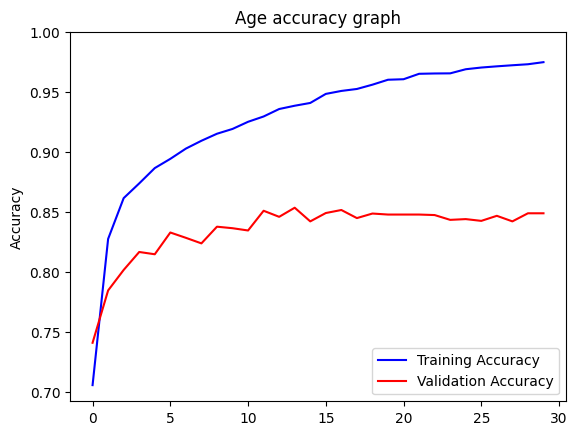

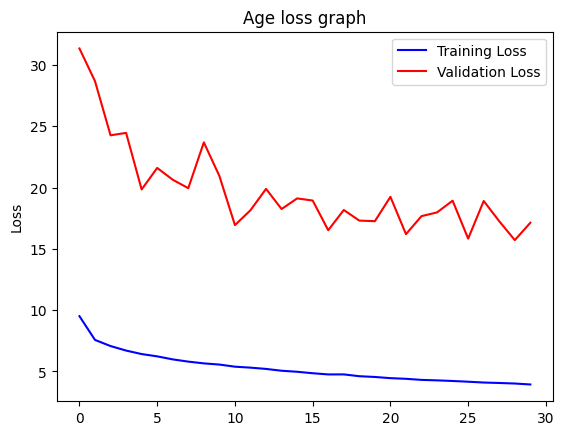

In [100]:
loss=history1.history['age_output_loss']
val_loss=history1.history['val_age_output_loss']
epochs=range(len(loss))



plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title("Age accuracy graph")
plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.legend(loc='upper right')
plt.title("Age loss graph")
plt.ylabel('Loss')


**Save evything**

In [292]:
save_model_and_history_to_csv(model1,history1,'G:\BME\machine-learning\IML project\saved_models', 'age_gender_model_30epochs_adam.keras','training_history_epoch30_reluactivation.csv')

Model and Training history saved to G:\BME\machine-learning\IML project\saved_models\training_history_epoch20_reluactivation.csv


True

##Neural network model with 30 epochs and sgd optimizer

In [296]:
model2=Model(inputs=inputs, outputs=[output_gender, output_age])

model2.compile(optimizer='sgd', loss=['binary_crossentropy', 'mae'], metrics={'gender_output': 'accuracy', 'age_output': 'mae'}) #we used adam optimizer during classes but sgd has momentum if we want to try
#mae(mean absolut error) for the gender
#binary cross entropy for the age
model2.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 128, 128, 1)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_8 (Conv2D)             │ (None, 126, 126, 32)      │             320 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_8               │ (None, 63, 63, 32)        │               0 │ conv2d_8[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_9 (Conv2D)             │ (None, 61, 61, 64)        │          18,496 │ max_pooling2d_8[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_9               │ (None, 30, 30, 64)        │               0 │ conv2d_9[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_10 (Conv2D)            │ (None, 28, 28, 128)       │          73,856 │ max_pooling2d_9[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_10              │ (None, 14, 14, 128)       │               0 │ conv2d_10[0][0]            │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_2 (Flatten)           │ (None, 25088)             │               0 │ max_pooling2d_10[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_4 (Dense)               │ (None, 256)               │       6,422,784 │ flatten_2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_5 (Dense)               │ (None, 256)               │       6,422,784 │ flatten_2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_4 (Dropout)           │ (None, 256)               │               0 │ dense_4[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_5 (Dropout)           │ (None, 256)               │               0 │ dense_5[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gender_output (Dense)         │ (None, 1)                 │             257 │ dropout_4[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ age_output (Dense)            │ (None, 1)                 │             257 │ dropout_5[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 12,938,754 (49.36 MB)

 Trainable params: 12,938,754 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

In [80]:
history2=model2.fit(x=extracted_features,y=[y_gender, y_age], epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 92s 156ms/step - age_output_loss: 3.8659 - age_output_mae: 3.8659 - gender_output_accuracy: 0.9768 - gender_output_loss: 0.0557 - loss: 3.9216 - val_age_output_loss: 18.1707 - val_age_output_mae: 18.2455 - val_gender_output_accuracy: 0.8448 - val_gender_output_loss: 0.9080 - val_loss: 19.1474
Epoch 2/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 92s 155ms/step - age_output_loss: 3.8378 - age_output_mae: 3.8378 - gender_output_accuracy: 0.9766 - gender_output_loss: 0.0536 - loss: 3.8914 - val_age_output_loss: 17.0464 - val_age_output_mae: 17.1128 - val_gender_output_accuracy: 0.8402 - val_gender_output_loss: 1.0009 - val_loss: 18.1011
Epoch 3/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 92s 155ms/step - age_output_loss: 3.8553 - age_output_mae: 3.8553 - gender_output_accuracy: 0.9763 - gender_output_loss: 0.0504 - loss: 3.9056 - val_age_output_loss: 16.4022 - val_age_output_mae: 16.4716 - val_gender_output_accuracy: 0.8496 - val_gender_output_loss: 0.9487 - val_loss: 17.412

## Evaluating the results - Loss and accuracy - 30 epochs-sgd optimizer

### Gender prediciton model

Text(0, 0.5, 'Loss')

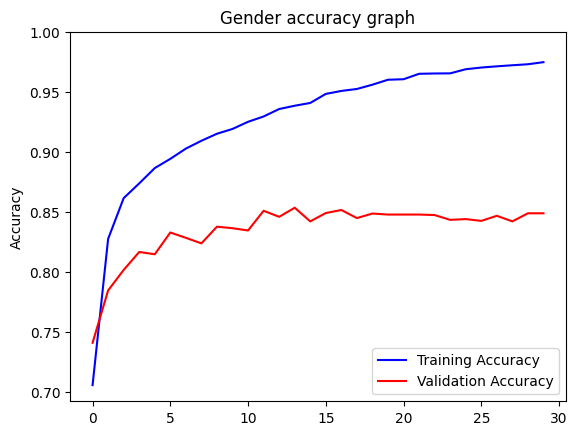

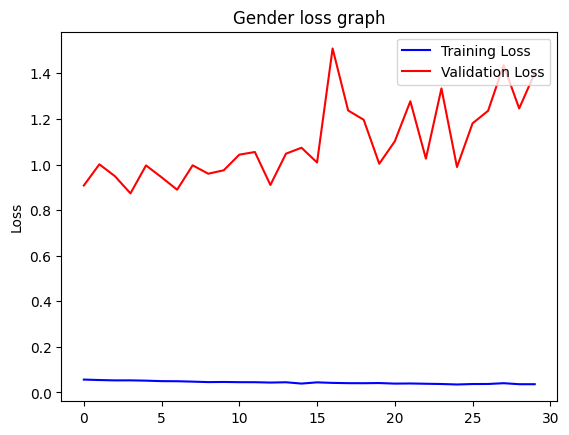

In [104]:
loss=history2.history['gender_output_loss']
val_loss=history2.history['val_gender_output_loss']
epochs=range(len(loss))



plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title("Gender accuracy graph")
plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.legend(loc='upper right')
plt.title("Gender loss graph")
plt.ylabel('Loss')

We can see that with SGD (Stochastic Gradient Descent) optimazation the loss function did not converge. SGD updates model weights using a fixed learning rate for all parameters, while Adam adapts the learning rate for each parameter individually. This results in the fact that even tho SGD can give more accurate results it is harder to get it to converge

### Age prediciton model

Text(0, 0.5, 'Loss')

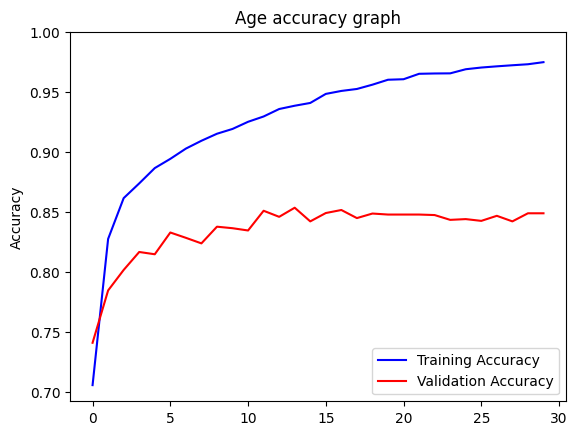

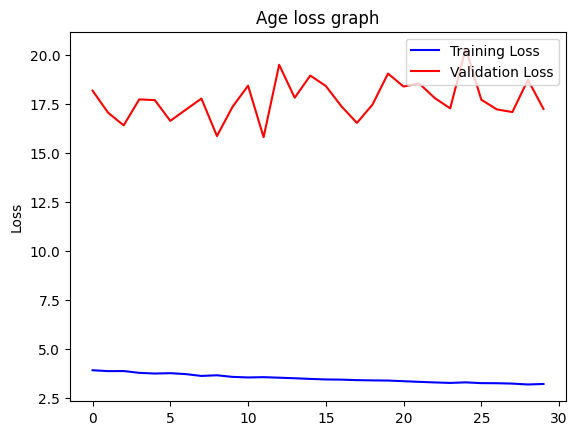

In [102]:
loss=history2.history['age_output_loss']
val_loss=history2.history['val_age_output_loss']
epochs=range(len(loss))



plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title("Age accuracy graph")
plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.legend(loc='upper right')
plt.title("Age loss graph")
plt.ylabel('Loss')

Same problem as we had with the gender prediction. As the loss function does not converge.

In [293]:
save_model_and_history_to_csv(model,history1,'G:\BME\machine-learning\IML project\saved_models', 'age_gender_model_30epochs_sgd.keras','training_history_epoch30_sgd_relu.csv')

Model and Training history saved to G:\BME\machine-learning\IML project\saved_models\training_history_epoch20_reluactivation.csv


True

# Conclusion

I have tested the model with the following different parameter combinations:

  * combination 1 - linear activation:
*   activation: linear
*   epochs: 20
*   optimizer: Adam

Turned out to be inaccurate, did not got included in the project

  * combination 2
*   activation: relu
*   epochs: 20
*   optimizer: Adam

Turned out to be the best model which achieved the best accuracy and loss at 12 epochs

  * combination 3
*   activation: relu
*   epochs: 30
*   optimizer: Adam

Resulted in an overfitted model. Did not improve on the previous iteration as my assumption about the minimum of the loss function at 12 epochs being a local minimum was wrong. The loss function diverged, increased with the number of epochs.

  * combination 4 - relu activation:
*   activation: relu
*   epochs: 30
*   optimizer: SGD (Stochastic Gradient Descent)

I knew it will probably take longer time to converge than the ADAM optimized version, but can potentially yield more accurate results. Unfortunately I could not get the model to converge

Best model would be combination 2 with 12 epochs

#Test - Gender and age prediction with test data

(np.float64(-0.5), np.float64(199.5), np.float64(199.5), np.float64(-0.5))

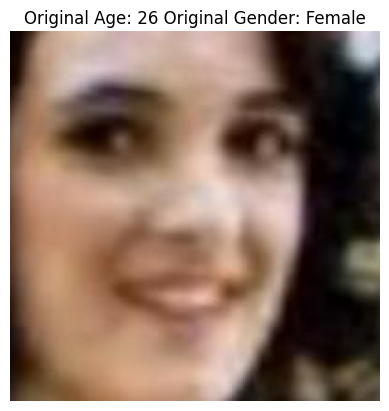

In [328]:
#select and display a random image

image_index=rnd.randint(0,len(df))
img=Image.open(df['image'][image_index])

plt.imshow(img)
plt.title(f"Original Age: {y_age[image_index]} Original Gender: {gender_dict[y_gender[image_index]]}")
plt.axis('off')


In [329]:
img = extract_features([df['image'][image_index]])
#Predict the age and gender using combination-2 model WATCH OUT IT IS CALLED "model"
pred=model.predict(img.reshape(1,128,128,1)) #first number gives the number of images in case we want to do more than one

#the first 0 and 1 means the ganeder or age, the second would be used in case of more images, the last contains the actual value
pred_gender=pred[0][0][0]
pred_age=pred[1][0][0]

#gender dict only takes int, and we need to round the predicted gender first anyway
print(f"Predicted Age: {pred_age} Predicted Gender: {gender_dict[int(np.round(pred_gender))]}")

  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Age: 25.027042388916016 Predicted Gender: Female


# Optimized model


From what we learned now we can produce a model with the highest accuracy we can achive.

In [308]:
model_opt=Model(inputs=inputs, outputs=[output_gender, output_age])

model_opt.compile(optimizer='adam', loss=['binary_crossentropy', 'mae'], metrics={'gender_output': 'accuracy', 'age_output': 'mae'}) #we used adam optimizer during classes but sgd has momentum if we want to try
#mae(mean absolut error) for the gender
#binary cross entropy for the age
model_opt.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 128, 128, 1)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_8 (Conv2D)             │ (None, 126, 126, 32)      │             320 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_8               │ (None, 63, 63, 32)        │               0 │ conv2d_8[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_9 (Conv2D)             │ (None, 61, 61, 64)        │          18,496 │ max_pooling2d_8[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_9               │ (None, 30, 30, 64)        │               0 │ conv2d_9[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_10 (Conv2D)            │ (None, 28, 28, 128)       │          73,856 │ max_pooling2d_9[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_10              │ (None, 14, 14, 128)       │               0 │ conv2d_10[0][0]            │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_2 (Flatten)           │ (None, 25088)             │               0 │ max_pooling2d_10[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_4 (Dense)               │ (None, 256)               │       6,422,784 │ flatten_2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_5 (Dense)               │ (None, 256)               │       6,422,784 │ flatten_2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_4 (Dropout)           │ (None, 256)               │               0 │ dense_4[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_5 (Dropout)           │ (None, 256)               │               0 │ dense_5[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gender_output (Dense)         │ (None, 1)                 │             257 │ dropout_4[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ age_output (Dense)            │ (None, 1)                 │             257 │ dropout_5[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 12,938,754 (49.36 MB)

 Trainable params: 12,938,754 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

In [310]:
history_opt=model_opt.fit(x=extracted_features,y=[y_gender, y_age], epochs=12, batch_size=64, validation_split=0.2)

Epoch 1/12
297/297 ━━━━━━━━━━━━━━━━━━━━ 77s 261ms/step - age_output_loss: 2.8723 - age_output_mae: 2.8723 - gender_output_accuracy: 0.9885 - gender_output_loss: 0.0307 - loss: 2.9030 - val_age_output_loss: 16.4402 - val_age_output_mae: 16.5796 - val_gender_output_accuracy: 0.8452 - val_gender_output_loss: 1.7239 - val_loss: 18.2739
Epoch 2/12
297/297 ━━━━━━━━━━━━━━━━━━━━ 75s 253ms/step - age_output_loss: 2.8186 - age_output_mae: 2.8185 - gender_output_accuracy: 0.9897 - gender_output_loss: 0.0276 - loss: 2.8461 - val_age_output_loss: 17.8291 - val_age_output_mae: 17.9972 - val_gender_output_accuracy: 0.8439 - val_gender_output_loss: 1.5351 - val_loss: 19.5079
Epoch 3/12
297/297 ━━━━━━━━━━━━━━━━━━━━ 75s 254ms/step - age_output_loss: 2.7876 - age_output_mae: 2.7876 - gender_output_accuracy: 0.9891 - gender_output_loss: 0.0282 - loss: 2.8158 - val_age_output_loss: 18.2997 - val_age_output_mae: 18.4728 - val_gender_output_accuracy: 0.8450 - val_gender_output_loss: 1.2154 - val_loss: 19.640

## Gender prediciton model-optimized

Text(0, 0.5, 'Loss')

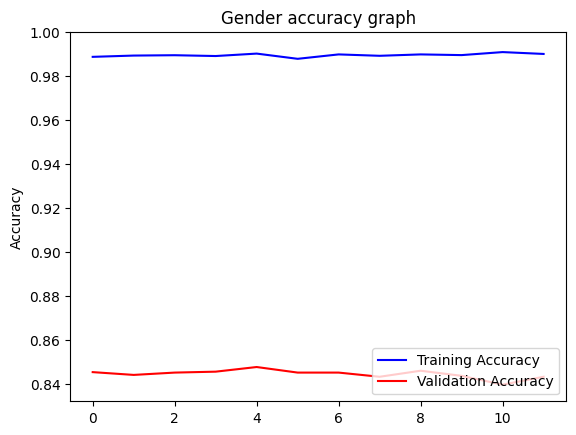

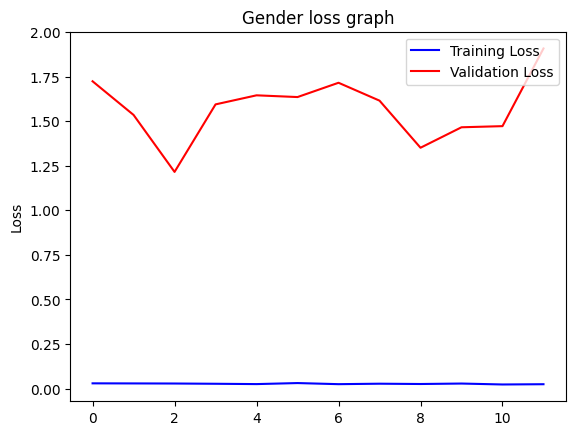

In [313]:
loss=history_opt.history['gender_output_loss']
val_loss=history_opt.history['val_gender_output_loss']
epochs=range(len(loss))



plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title("Gender accuracy graph")
plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.legend(loc='upper right')
plt.title("Gender loss graph")
plt.ylabel('Loss')

## Age prediciton model-optimized

Text(0, 0.5, 'Loss')

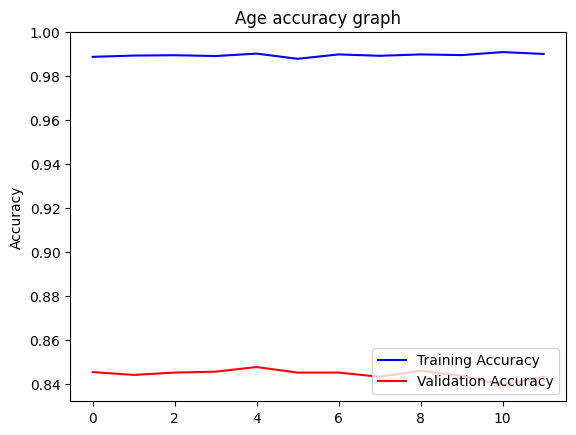

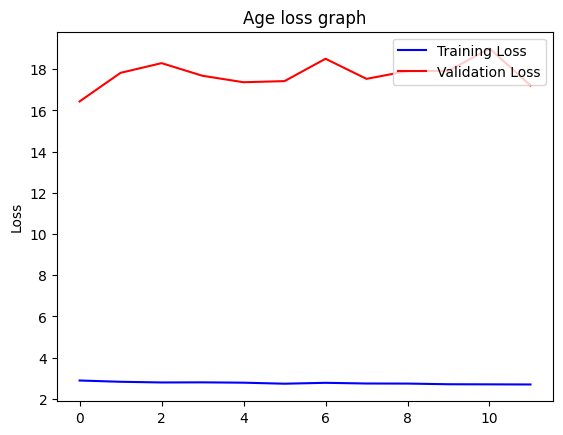

In [314]:
loss=history_opt.history['age_output_loss']
val_loss=history_opt.history['val_age_output_loss']
epochs=range(len(loss))



plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title("Age accuracy graph")
plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.legend(loc='upper right')
plt.title("Age loss graph")
plt.ylabel('Loss')

**Save everything**

In [315]:
save_model_and_history_to_csv(model_opt,history_opt,'G:\BME\machine-learning\IML project\saved_models', 'age_gender_model_epoch12_sgd.keras','training_history_epoch12_adam_relu.csv')

Model and Training history saved to G:\BME\machine-learning\IML project\saved_models\training_history_epoch20_reluactivation.csv


True

## Test - Gender and age prediction with optimized model

(np.float64(-0.5), np.float64(199.5), np.float64(199.5), np.float64(-0.5))

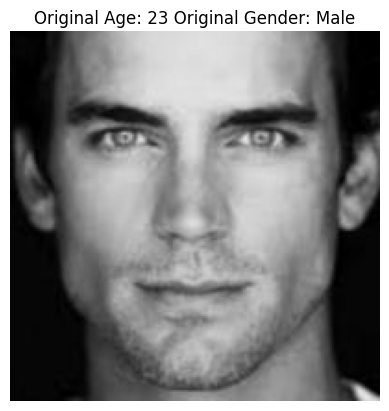

In [333]:
#select and display a random image

image_index=rnd.randint(0,len(df))
img=Image.open(df['image'][image_index])

plt.imshow(img)
plt.title(f"Original Age: {y_age[image_index]} Original Gender: {gender_dict[y_gender[image_index]]}")
plt.axis('off')


In [334]:
img = extract_features([df['image'][image_index]])
#Predict the age and gender using combination-2 model WATCH OUT IT IS CALLED "model"
pred=model.predict(img.reshape(1,128,128,1)) #first number gives the number of images in case we wna to do more than one

#the first 0 and 1 means the ganeder or age, the second would be used in case of more images, the last contains the actual value
pred_gender=pred[0][0][0]
pred_age=pred[1][0][0]

#gender dict only takes int, and we need to round the predicted gender first anyway
print(f"Predicted Age: {pred_age} Predicted Gender: {gender_dict[int(np.round(pred_gender))]}")

  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Age: 23.397953033447266 Predicted Gender: Male
